# Лабораторная работа №5
Выполнила: Богданова Ю.Н., гр.6233-010402D

# Исследование набора данных

Попробуйте исследовать данных из выбранного набора `vega_dataset` с использованием изученных функций:

- различные метки: ``mark_point()``, ``mark_line()``, ``mark_tick()``, ``mark_bar()``, ``mark_area()``, ``mark_rect()``, и т.д.
- различные кодирования: ``x``, ``y``, ``color``, ``shape``, ``size``, ``row``, ``column``, ``text``, ``tooltip``, и т.д.
- группировки и агрегаторы: [Список агрегаторов](https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation) можно найти в документации Altair
- панели (``alt.layer`` <-> ``+``, ``alt.hconcat`` <-> ``|``, ``alt.vconcat`` <-> ``&``)

In [1]:
import numpy as np
import pandas as pd
import altair as alt
from vega_datasets import data

In [2]:
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [3]:
df = data.climate()
df.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HLY-TEMP-NORMAL,HLY-PRES-NORMAL,HLY-DEWP-NORMAL
0,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,2010-01-01 00:00:00,349,10205,289
1,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,2010-01-01 01:00:00,344,10202,287
2,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,2010-01-01 02:00:00,339,10200,284
3,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,2010-01-01 03:00:00,334,10202,283
4,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,2010-01-01 04:00:00,331,10202,280


In [4]:
df1 = df.iloc[:1]
alt.Chart(df1).mark_point().to_dict()

C:\Users\Julia\AppData\Roaming\Python\Python310\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


{'config': {'view': {'continuousWidth': 400, 'continuousHeight': 300}},
 'data': {'name': 'data-6ec479a3aa61019c508894f2be93403a'},
 'mark': 'point',
 '$schema': 'https://vega.github.io/schema/vega-lite/v4.17.0.json',
 'datasets': {'data-6ec479a3aa61019c508894f2be93403a': [{'STATION': 'GHCND:USW00003812',
    'STATION_NAME': 'ASHEVILLE REGIONAL AIRPORT NC US',
    'ELEVATION': 645.3,
    'LATITUDE': 35.43194,
    'LONGITUDE': -82.5375,
    'DATE': '2010-01-01T00:00:00',
    'HLY-TEMP-NORMAL': 349,
    'HLY-PRES-NORMAL': 10205,
    'HLY-DEWP-NORMAL': 289}]}}

In [5]:
alt.Chart(df).mark_point()

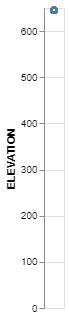

In [6]:
alt.Chart(df).mark_point().encode(
    y='ELEVATION'
)

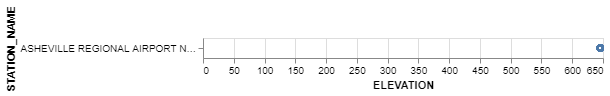

In [7]:
alt.Chart(df).mark_point().encode(
    y='STATION_NAME',
    x='ELEVATION'
)

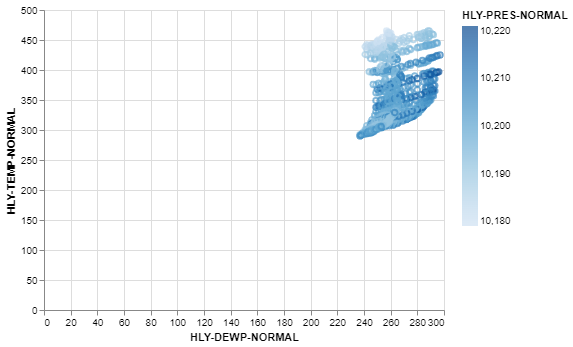

In [8]:
alt.Chart(df).mark_point().encode(
    color='HLY-PRES-NORMAL',
    y='HLY-TEMP-NORMAL',
    x='HLY-DEWP-NORMAL'
)

In [9]:
df = data.disasters()
df.head()

,Entity,Year,Deaths
0,All natural disasters,1900,1267360
1,All natural disasters,1901,200018
2,All natural disasters,1902,46037
3,All natural disasters,1903,6506
4,All natural disasters,1905,22758


C:\Users\Julia\AppData\Roaming\Python\Python310\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


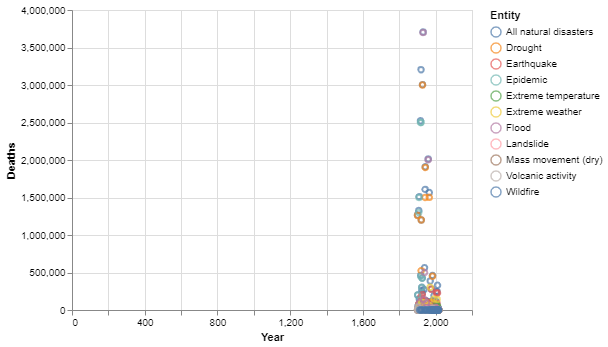

In [10]:
alt.Chart(df).mark_point().encode(
    color='Entity',
    y='Deaths',
    x='Year'
)

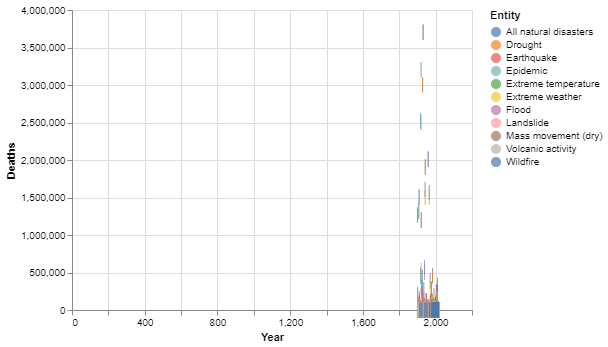

In [11]:
alt.Chart(df).mark_tick().encode(
    color='Entity',
    y='Deaths',
    x='Year'
)

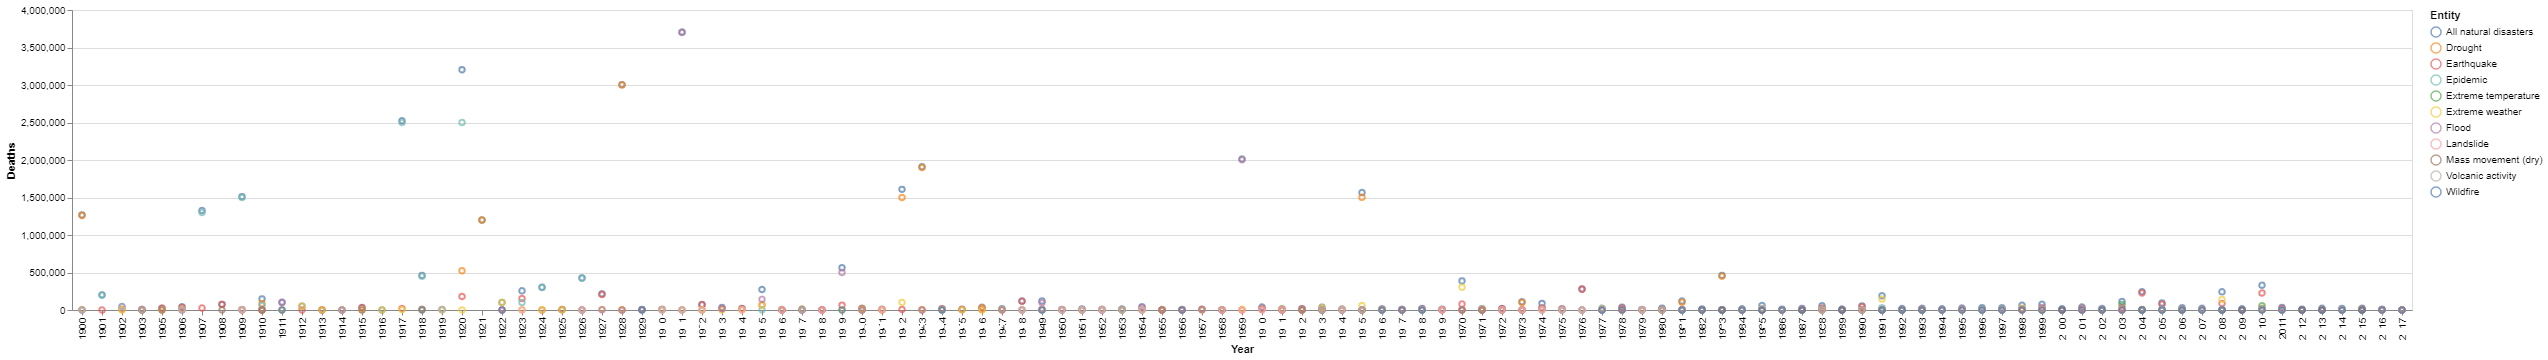

In [12]:
alt.Chart(df).mark_point().encode(
    color='Entity:N',
    y='Deaths:Q',
    x='Year:O'
)

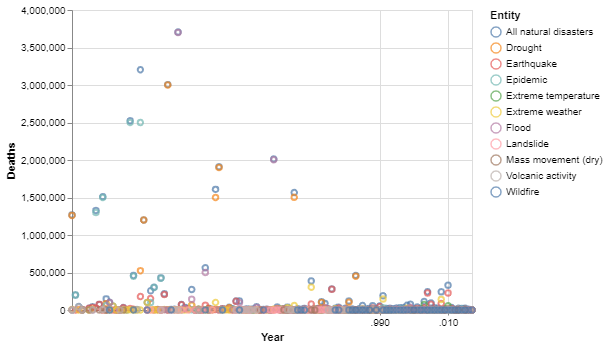

In [13]:
alt.Chart(df).mark_point().encode(
    color='Entity:N',
    y='Deaths:Q',
    x='Year:T'
)

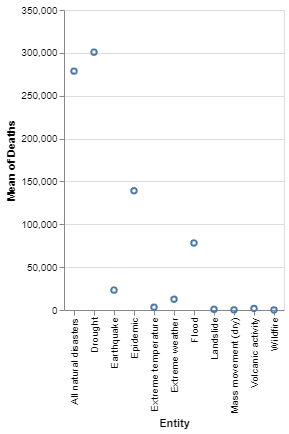

In [14]:
alt.Chart(df).mark_point().encode(
    y='mean(Deaths):Q',
    x='Entity:N'
)

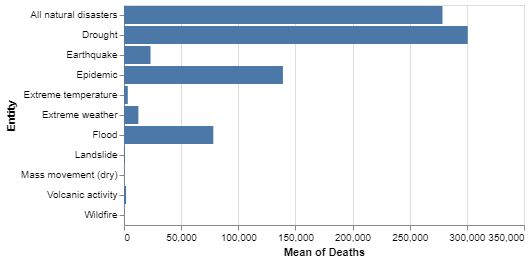

In [15]:
alt.Chart(df).mark_bar().encode(
    x='mean(Deaths):Q',
    y='Entity:N'
)

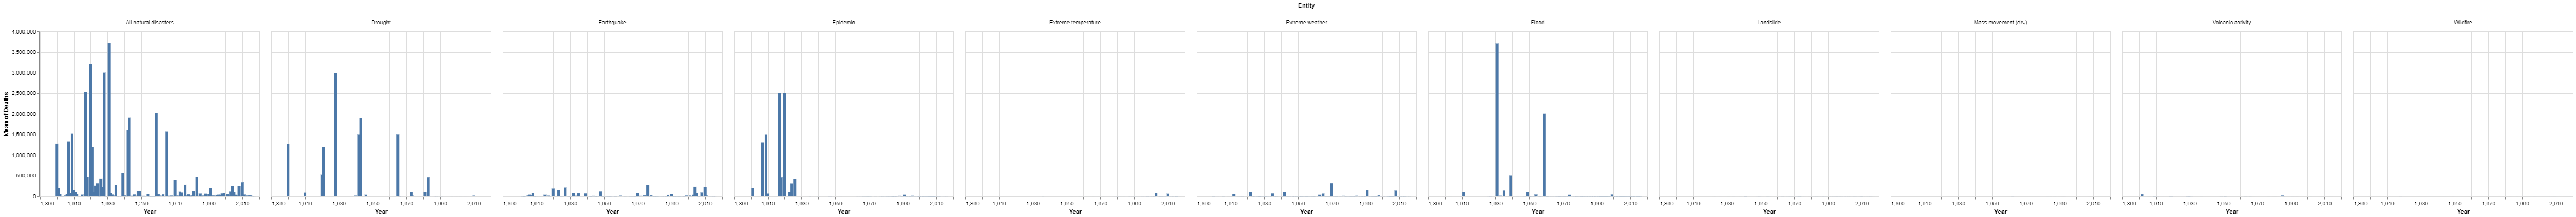

In [16]:
alt.Chart(df).mark_bar().encode(
    y='mean(Deaths):Q',
    column='Entity:N',
    x='Year'
)

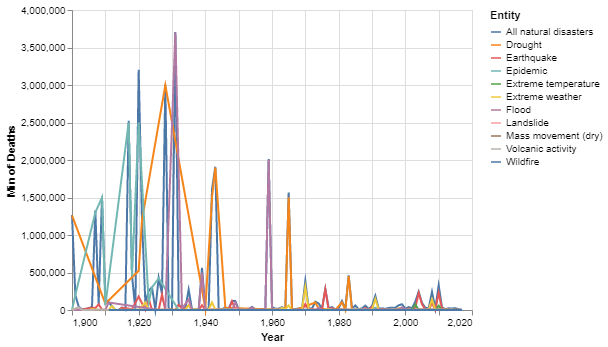

In [17]:
alt.Chart(df).mark_line().encode(
    color='Entity',
    y='min(Deaths)',
    x='Year'
)

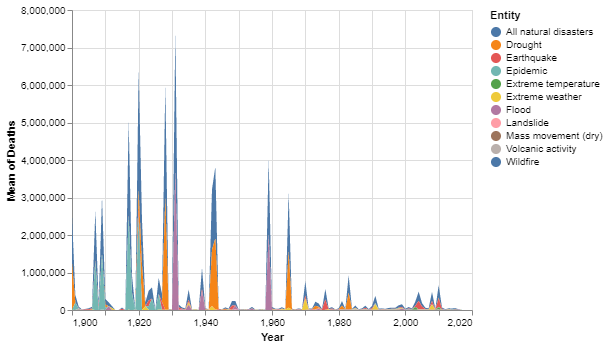

In [18]:
alt.Chart(df).mark_area().encode(
    color='Entity',
    y='mean(Deaths)',
    x='Year'
)

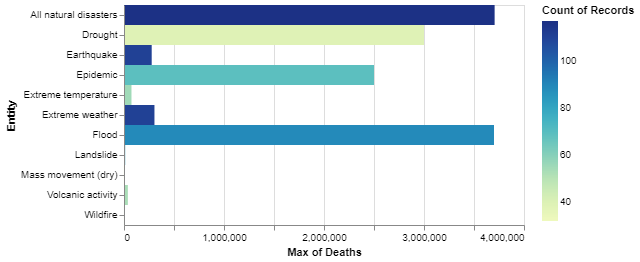

In [19]:
alt.Chart(df).mark_rect().encode(
    x='max(Deaths)',
    y='Entity',
    color='count()'
)

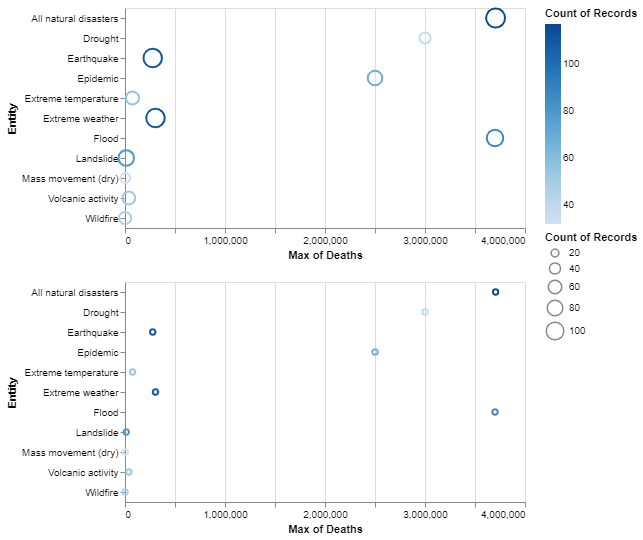

In [20]:
sizevar = alt.Chart(df).mark_point().encode(
    x='max(Deaths)',
    y='Entity',
    size='count()',
    color='count()'
)

colorvar = alt.Chart(df).mark_point().encode(
    x='max(Deaths)',
    y='Entity',
    color='count()',
    tooltip='count()'
)

sizevar&colorvar

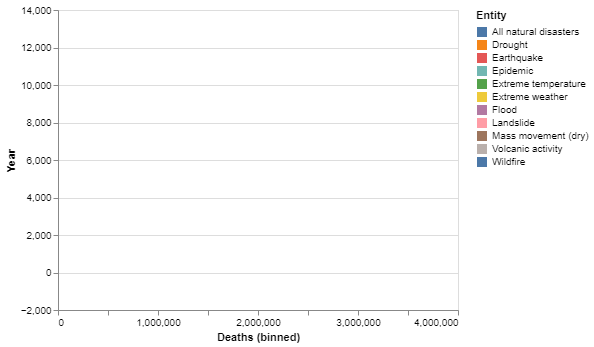

In [21]:
alt.Chart(df).mark_bar().encode(
    alt.X('max(Deaths)', bin=True),
    alt.Y('Year'),
    alt.Color('Entity')
)

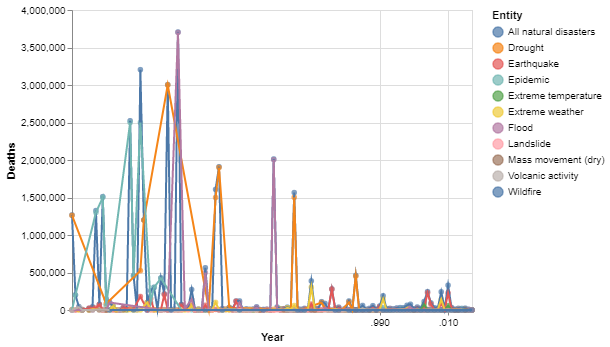

In [22]:
dots = alt.Chart(df).mark_circle().encode(
    x='Year:T',
    y='Deaths:Q',
    color='Entity:N'
)

lines = alt.Chart(df).mark_line().encode(
    x='Year:T',
    y='Deaths:Q',
    color='Entity:N'
)

dots+lines

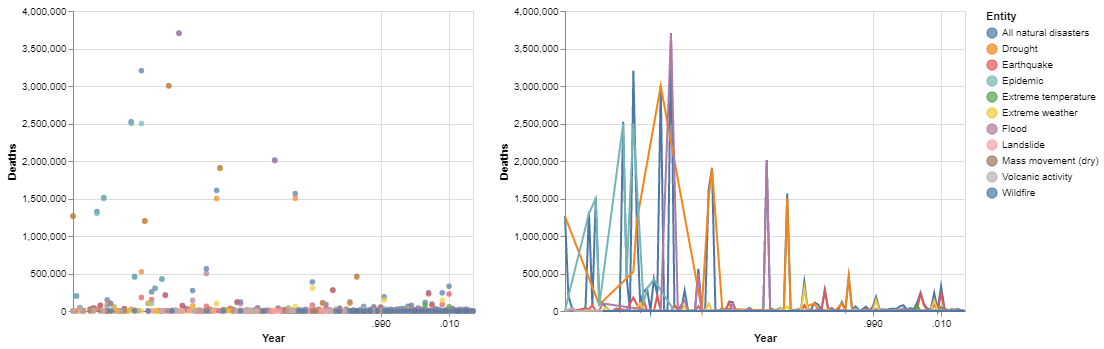

In [23]:
dots | lines